In [1]:
from pyforest import*
import warnings
warnings.filterwarnings('ignore')

In [2]:
lazy_imports()

['import imutils',
 'from dask import dataframe as dd',
 'import tensorflow as tf',
 'from PIL import Image',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import xgboost as xgb',
 'from sklearn.linear_model import Lasso',
 'from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.linear_model import RidgeCV',
 'import bokeh',
 'from sklearn.preprocessing import MinMaxScaler',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import LassoCV',
 'import gensim',
 'import re',
 'from pathlib import Path',
 'import sklearn',
 'import nltk',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import awswrangler as wr',
 'from sklearn.decomposition import PCA',
 'import plotly as py',
 'import plotly.express as px',
 'import keras',
 'from sklearn.cluster import KMeans',
 'import fastai',
 'from sklearn.model_selection import cross_val_score',
 'import spacy',
 'from statsmodels.tsa.arima_model 

['import imutils',
 'from dask import dataframe as dd',
 'import tensorflow as tf',
 'from PIL import Image',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import xgboost as xgb',
 'from sklearn.linear_model import Lasso',
 'from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.linear_model import RidgeCV',
 'import bokeh',
 'from sklearn.preprocessing import MinMaxScaler',
 'import matplotlib.pyplot as plt',
 'from sklearn.linear_model import LassoCV',
 'import gensim',
 'import re',
 'from pathlib import Path',
 'import sklearn',
 'import nltk',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import awswrangler as wr',
 'from sklearn.decomposition import PCA',
 'import plotly as py',
 'import plotly.express as px',
 'import keras',
 'from sklearn.cluster import KMeans',
 'import fastai',
 'from sklearn.model_selection import cross_val_score',
 'import spacy',
 'from statsmodels.tsa.arima_model 

### NOW WE ARE IMPORTING THE DATASET

In [3]:
train = pd.read_csv(r"C:\Users\HP\Downloads\ML project datasets\amazontrain.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train.head(4)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322


In [5]:
test = pd.read_csv(r"C:\Users\HP\Downloads\ML project datasets\amazontest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
test.head(4)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774


,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774


In [7]:
train.shape

(32769, 10)

(32769, 10)

In [8]:
test.shape

(58921, 10)

(58921, 10)

## HERE WE WILL USE CATBOOST ALGORITHM , THIS ALGORITHM IS VERY USEFULL WHEN YOU DEAL WITH THE DATA WHICH IS IN CATEGORIAL FORM

In [9]:
# loding data directly from catboost
from catboost.datasets import amazon
traindf,testdf =amazon()

# Means that we don't need to upload the dataset into the csv format for amazon dataset we can directly import from the catboost
# dataset.

In [10]:
traindf.head(4)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322


In [11]:
testdf.head(4)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774


,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774


In [12]:
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [13]:
traindf['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

In [14]:
traindf.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

### DISTRIBUTION OF FEATURES WITH THE HELP OF GRAPH

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

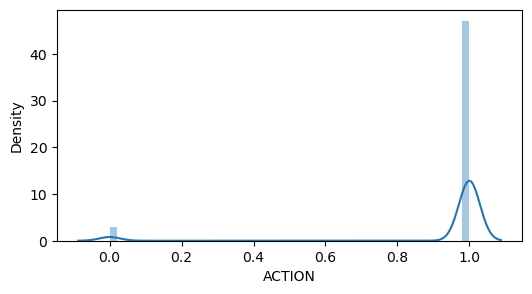

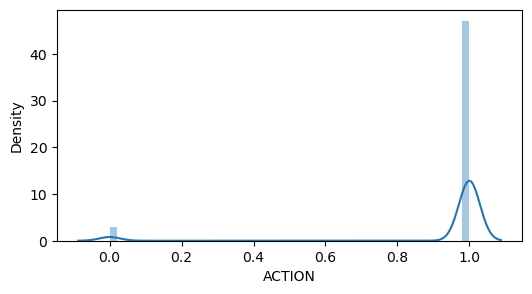

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

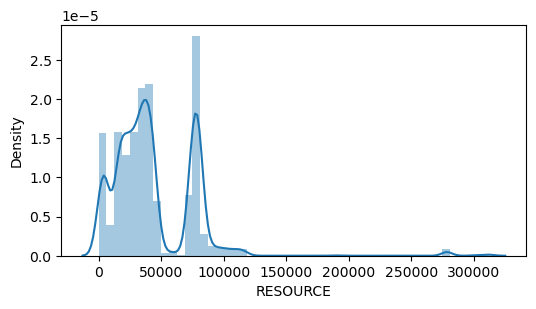

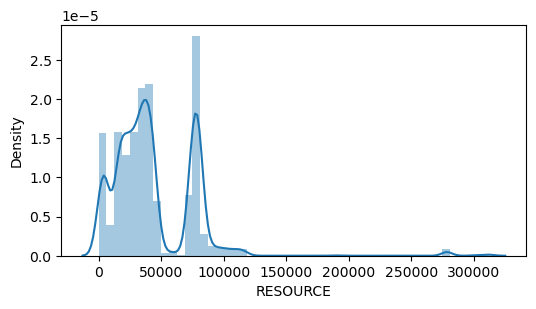

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

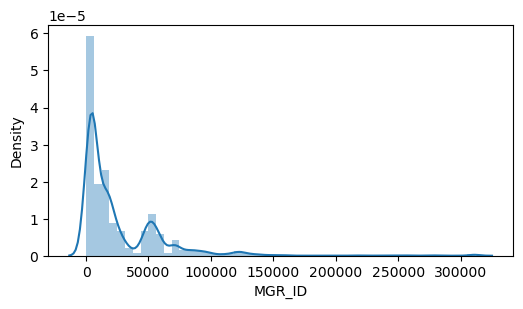

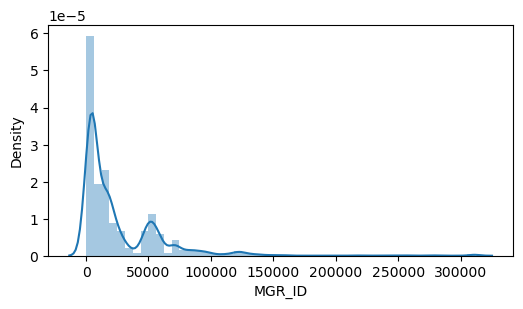

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

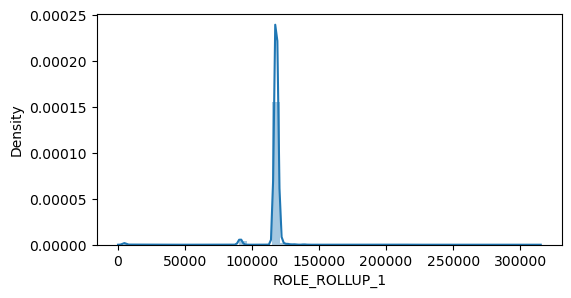

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

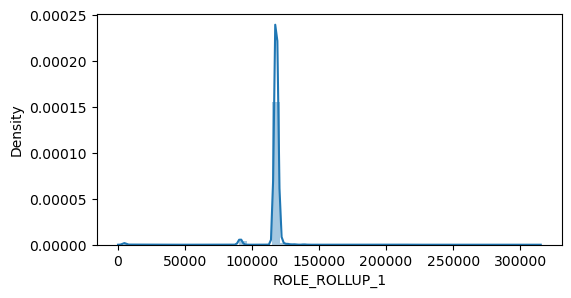

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

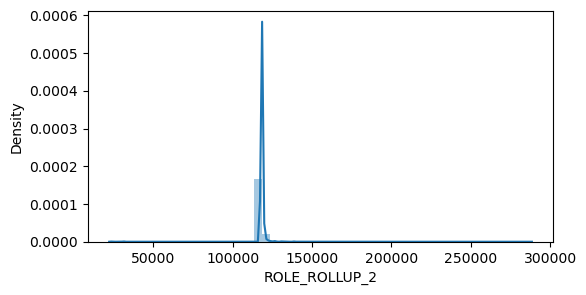

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

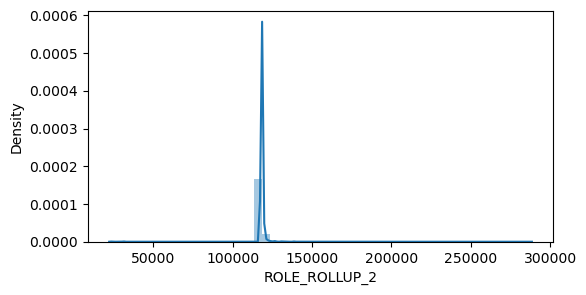

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

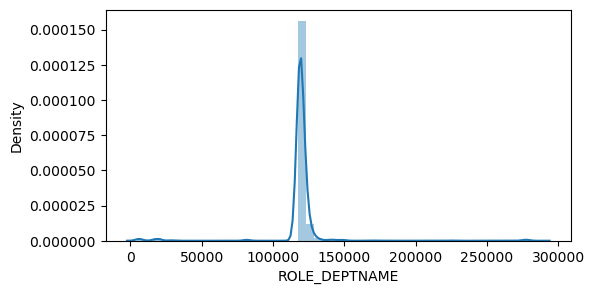

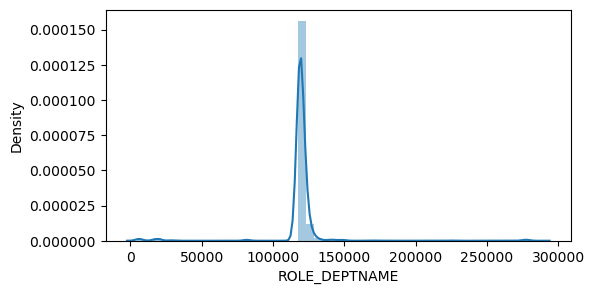

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

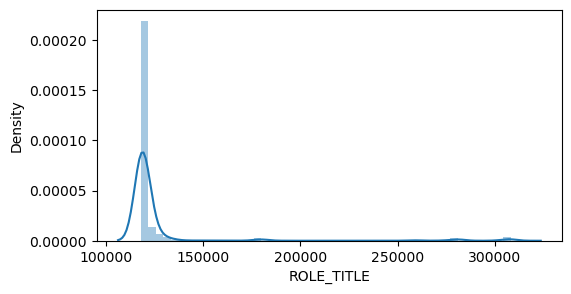

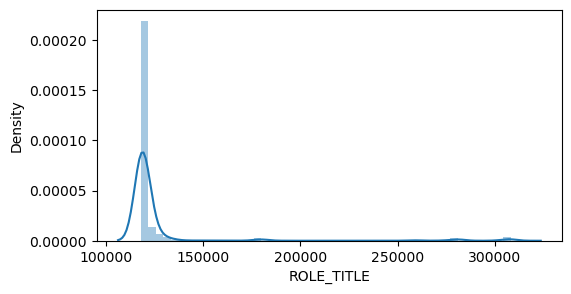

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

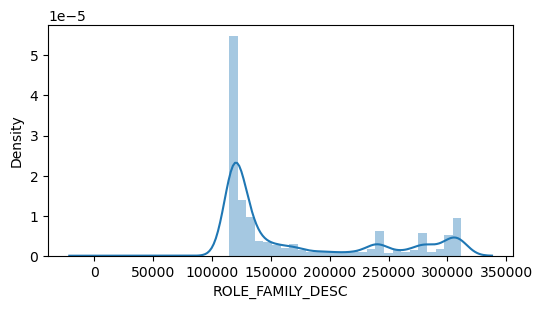

<IPython.core.display.Javascript object>

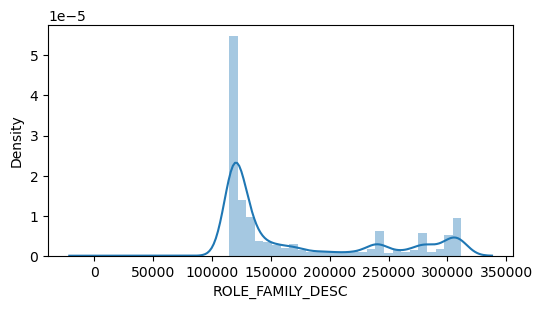

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

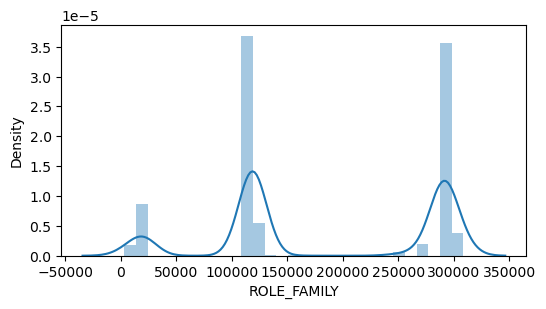

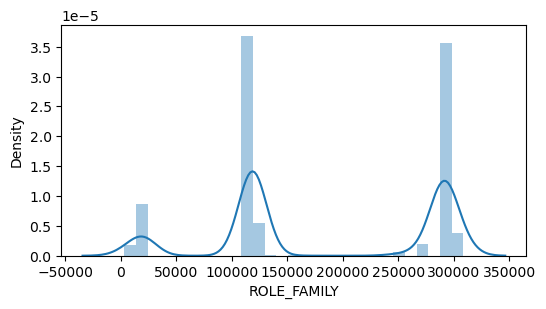

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

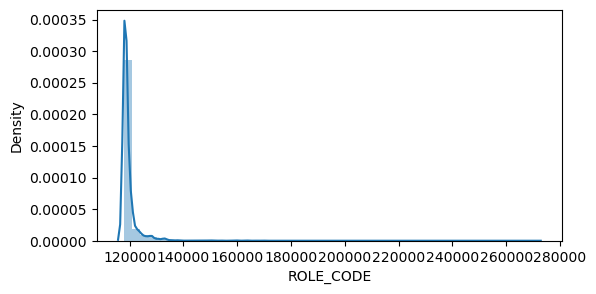

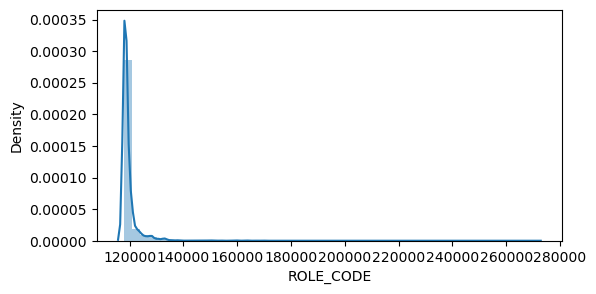

In [15]:
for i in traindf.describe().columns:
    plt.figure(figsize=(6,3))
    sns.distplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

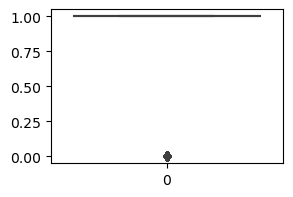

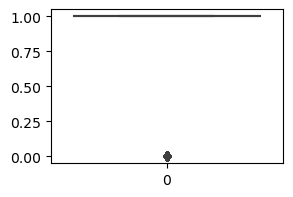

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

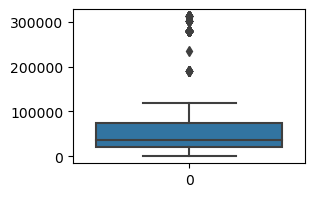

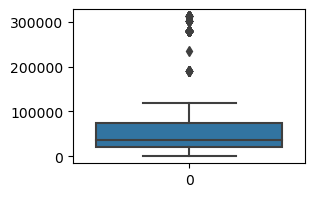

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

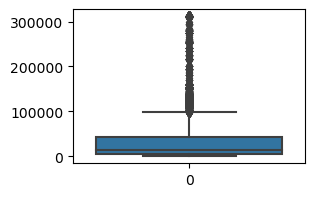

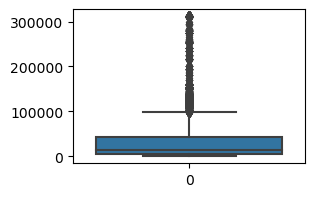

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

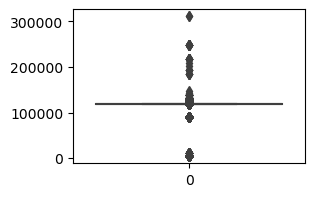

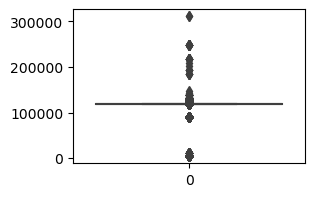

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

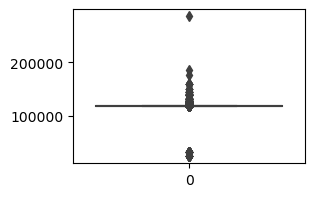

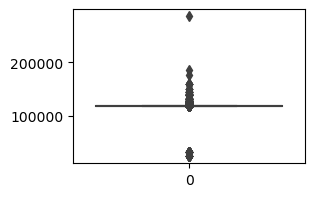

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

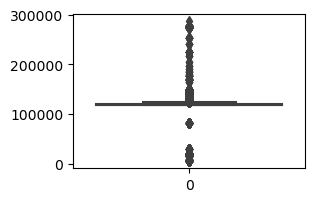

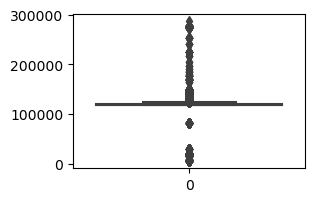

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

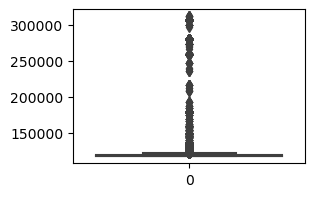

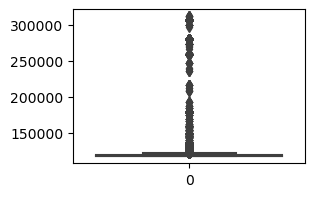

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

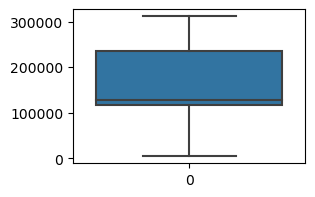

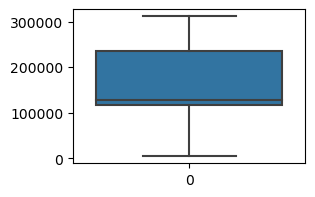

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

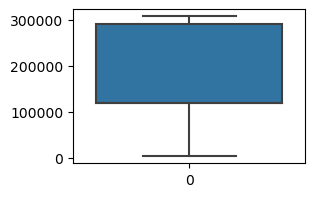

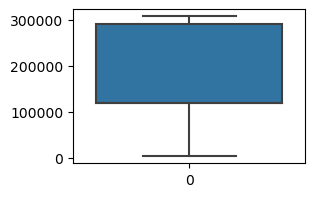

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

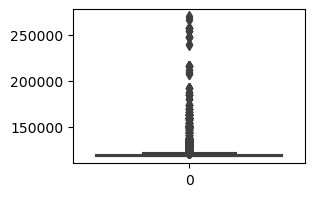

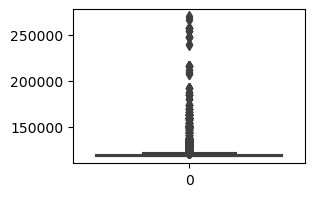

In [16]:
for i in traindf.describe().columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(traindf[i].dropna())
    plt.show()

In [17]:
# We can check the no of 1 and no of 0 in the target variable and with the help of that we can analyze sometime that the 
# condition is not good and there can be a major problem of data imbalance.

# And for handling data imbalance we can use resample technique and we can use upsample and downsample .
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

1    30872
0     1897
Name: ACTION, dtype: int64

In [18]:
traindf.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

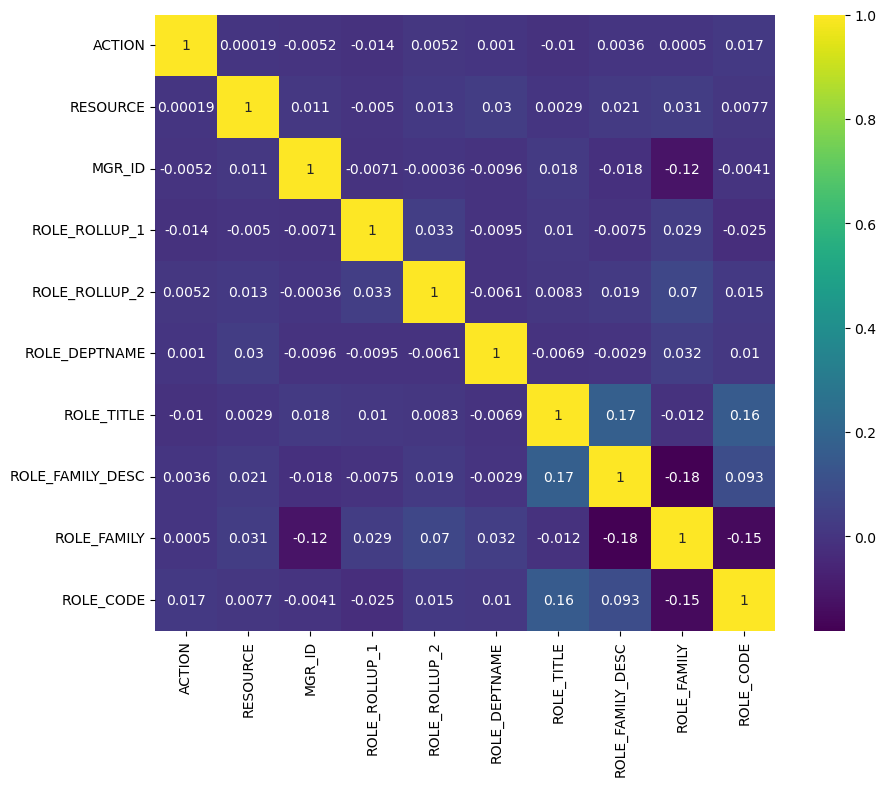

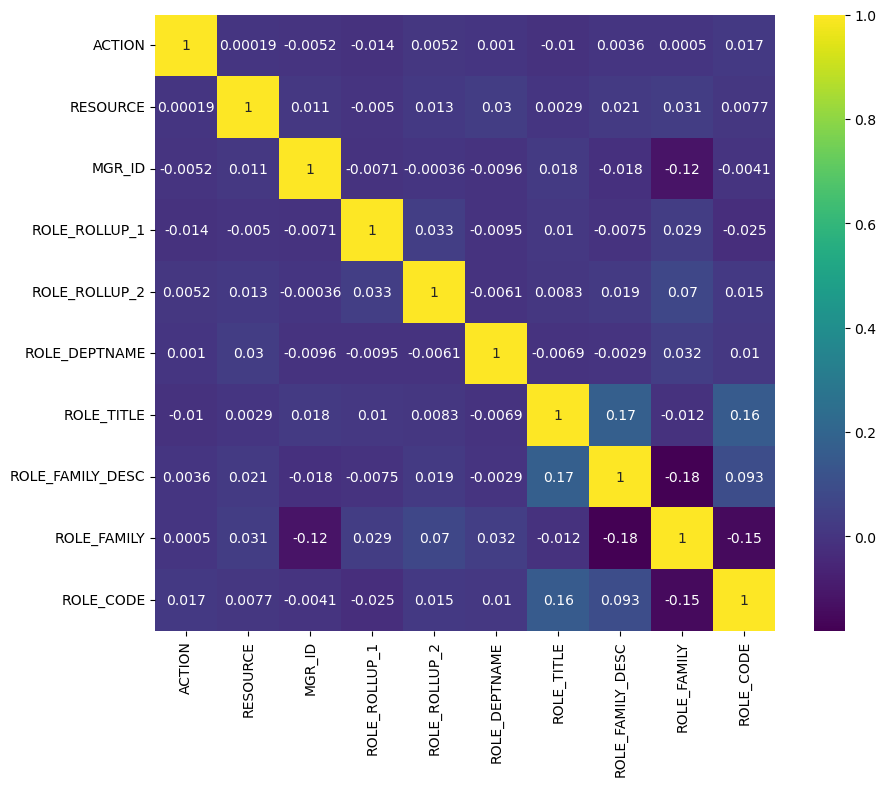

In [19]:
# IMPORTANT NOTE --- IF the correlation is too high then there is a risk of multicollinearity .and then it can be the case of 
# overfitting and we have to deal with that.
plt.figure(figsize=(10,8))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis')
plt.show()

# MODEL BUILDING

In [20]:
y = traindf['ACTION']
x = traindf.drop('ACTION',axis=1)
x_test = testdf.drop('id',axis=1)

In [21]:
x.head(4)

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322


In [22]:
y = pd.DataFrame(y)
y.head(4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ACTION
0,1
1,1
2,1
3,1


,ACTION
0,1
1,1
2,1
3,1


In [23]:
y.shape

(32769, 1)

(32769, 1)

In [24]:
x.shape

(32769, 9)

(32769, 9)

In [25]:
x_test.shape

(58921, 9)

(58921, 9)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.25,random_state=23)

In [27]:
x_train.shape

(24576, 9)

(24576, 9)

In [28]:
y_train.shape

(24576, 1)

(24576, 1)

In [29]:
x_val.shape

(8193, 9)

(8193, 9)

In [30]:
y_val.shape

(8193, 1)

(8193, 1)

#In this model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked.

In [31]:
from catboost import CatBoostClassifier
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
cat_model = CatBoostClassifier(**params)
cat_model.fit(x_train,y_train,
          eval_set=(x_val, y_val),
          use_best_model=True, 
         );

Learning rate set to 0.069882
Learning rate set to 0.069882
0:	test: 0.5841682	best: 0.5841682 (0)	total: 235ms	remaining: 3m 54s
0:	test: 0.5841682	best: 0.5841682 (0)	total: 235ms	remaining: 3m 54s
200:	test: 0.7913281	best: 0.7913932 (198)	total: 3.4s	remaining: 13.5s
200:	test: 0.7913281	best: 0.7913932 (198)	total: 3.4s	remaining: 13.5s
400:	test: 0.8156710	best: 0.8157124 (393)	total: 7.81s	remaining: 11.7s
400:	test: 0.8156710	best: 0.8157124 (393)	total: 7.81s	remaining: 11.7s
600:	test: 0.8260626	best: 0.8262827 (564)	total: 12s	remaining: 7.93s
600:	test: 0.8260626	best: 0.8262827 (564)	total: 12s	remaining: 7.93s
800:	test: 0.8317132	best: 0.8321240 (787)	total: 15.9s	remaining: 3.95s
800:	test: 0.8317132	best: 0.8321240 (787)	total: 15.9s	remaining: 3.95s
999:	test: 0.8352144	best: 0.8352144 (999)	total: 19.3s	remaining: 0us

bestTest = 0.8352143588
bestIteration = 999

999:	test: 0.8352144	best: 0.8352144 (999)	total: 19.3s	remaining: 0us

bestTest = 0.8352143588
bestItera

In [32]:
#In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. 
# We need to specify which features are categorical

categorical_features= list(range(x.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [33]:
# In this model we specify the features are categorical.
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'cat_features': categorical_features,
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
cat_model = CatBoostClassifier(**params)
cat_model.fit(x_train,y_train,
          eval_set=(x_val, y_val),
          use_best_model=True, 
         );

Learning rate set to 0.069882
0:	test: 0.5816104	best: 0.5816104 (0)	total: 137ms	remaining: 2m 17s
Learning rate set to 0.069882
0:	test: 0.5816104	best: 0.5816104 (0)	total: 137ms	remaining: 2m 17s
200:	test: 0.8919836	best: 0.8920906 (194)	total: 28.2s	remaining: 1m 52s
200:	test: 0.8919836	best: 0.8920906 (194)	total: 28.2s	remaining: 1m 52s
400:	test: 0.8944607	best: 0.8944607 (400)	total: 57.6s	remaining: 1m 26s
400:	test: 0.8944607	best: 0.8944607 (400)	total: 57.6s	remaining: 1m 26s
600:	test: 0.8945959	best: 0.8949157 (500)	total: 1m 25s	remaining: 56.9s
600:	test: 0.8945959	best: 0.8949157 (500)	total: 1m 25s	remaining: 56.9s
800:	test: 0.8934153	best: 0.8950867 (692)	total: 1m 51s	remaining: 27.7s
800:	test: 0.8934153	best: 0.8950867 (692)	total: 1m 51s	remaining: 27.7s
999:	test: 0.8920770	best: 0.8950867 (692)	total: 2m 19s	remaining: 0us

bestTest = 0.8950867397
bestIteration = 692

Shrink model to first 693 iterations.
999:	test: 0.8920770	best: 0.8950867 (692)	total: 2m

### CROSS VALIDATION

In [34]:
from catboost import CatBoostClassifier, Pool

from catboost import cv

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1
         }

# pool for Dataset processing.

total_train_data = Pool(data=x,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params, 
            fold_count=4,
            seed=1, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )


Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 20ms	remaining: 20s
Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 20ms	remaining: 20s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 27s	remaining: 1m 47s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 27s	remaining: 1m 47s
400:	test: 0.8976768	best: 0.8976768 (400)	total: 54.8s	remaining: 1m 21s
400:	test: 0.8976768	best: 0.8976768 (400)	total: 54.8s	remaining: 1m 21s
600:	test: 0.9012104	best: 0.9012104 (600)	total: 1m 23s	remaining: 55.4s
600:	test: 0.9012104	best: 0.9012104 (600)	total: 1m 23s	remaining: 55.4s
800:	test: 0.9026744	best: 0.9029761 (755)	total: 1m 48s	remaining: 27.1s
800:	test: 0.9026744	best: 0.9029761 (755)	total: 1m 48s	remaining: 27.1s
999:	test: 0.9035036	best: 0.9035617 (989)	total: 2m 14s	remaining: 0us

bestTest = 0.9035617354
bestIteration = 989

Training on fold [1/4]
999:	test: 0.9035036	best: 0.9035617 (989)	total: 2m 14s	remaining: 0us

bestTest = 0.9035617

In [35]:
feature_importance = cat_model.get_feature_importance(prettified=True)

In [40]:
feature_importance

,Feature Id,Importances
0,RESOURCE,20.048904
1,ROLE_DEPTNAME,17.005700
2,MGR_ID,14.167552
3,ROLE_ROLLUP_2,10.884959
4,ROLE_FAMILY_DESC,10.488786
5,ROLE_TITLE,9.718162
6,ROLE_FAMILY,5.988017
7,ROLE_ROLLUP_1,5.963280
8,ROLE_CODE,5.734639


,Feature Id,Importances
0,RESOURCE,20.048904
1,ROLE_DEPTNAME,17.005700
2,MGR_ID,14.167552
3,ROLE_ROLLUP_2,10.884959
4,ROLE_FAMILY_DESC,10.488786
5,ROLE_TITLE,9.718162
6,ROLE_FAMILY,5.988017
7,ROLE_ROLLUP_1,5.963280
8,ROLE_CODE,5.734639


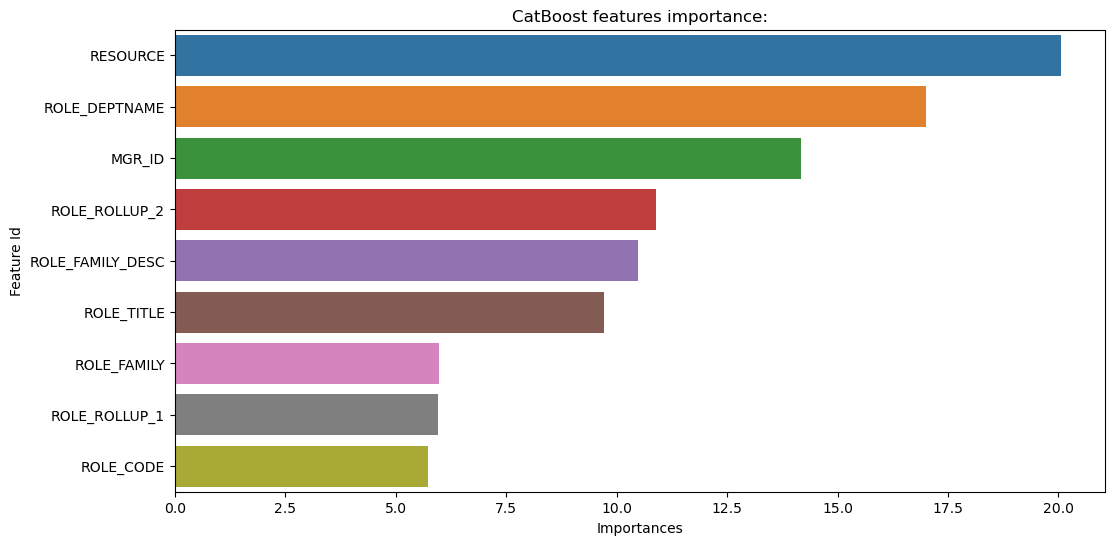

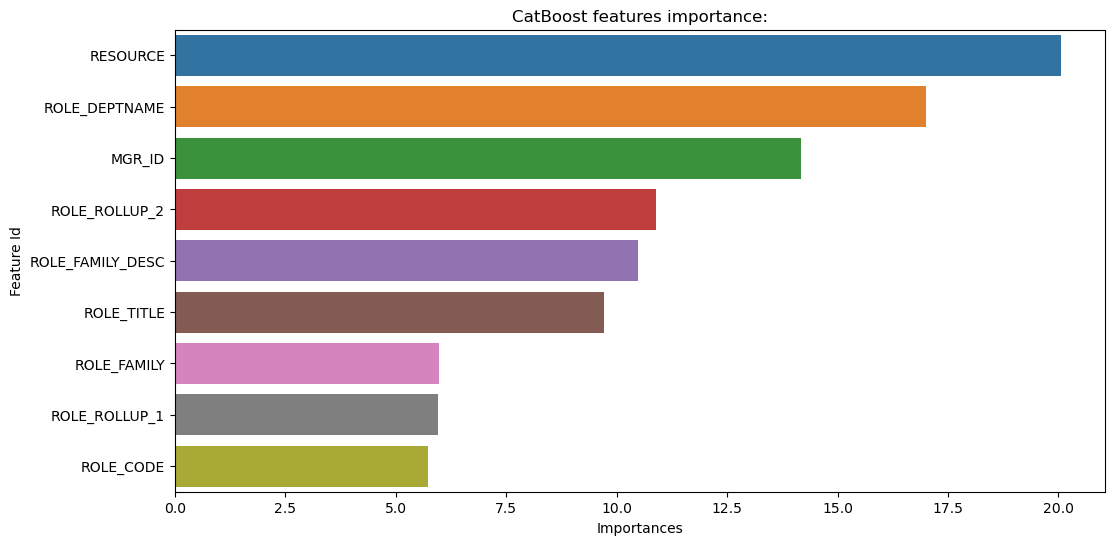

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance);
plt.title('CatBoost features importance:');


In [45]:
predictions=cat_model.predict_proba(x_test)

In [46]:
predictions

array([[0.59374076, 0.40625924],
       [0.00969375, 0.99030625],
       [0.00832466, 0.99167534],
       ...,
       [0.00617095, 0.99382905],
       [0.05569234, 0.94430766],
       [0.00954637, 0.99045363]])

array([[0.59374076, 0.40625924],
       [0.00969375, 0.99030625],
       [0.00832466, 0.99167534],
       ...,
       [0.00617095, 0.99382905],
       [0.05569234, 0.94430766],
       [0.00954637, 0.99045363]])

In [47]:
predictions=cat_model.predict(x_test)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
catmodel.score(x_valid, y_valid)